## Importing libraries 

In [346]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import colors
from matplotlib.pyplot import figure


import seaborn as sns
import plotly.express as px

%matplotlib inline



## Data

In [347]:
df = pd.read_csv('movies.csv')

In [348]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## First things first, let's clean the data

#### Taking care of missing data

<AxesSubplot:>

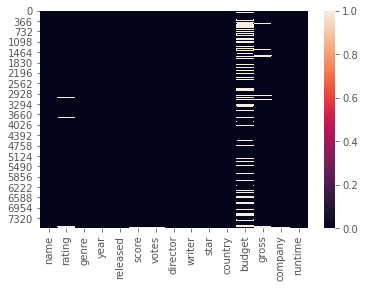

In [349]:
sns.heatmap(df.isnull())

In [350]:
df.isnull().sum().sort_values(ascending=False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64



Let's take a closer look at the missing values in budget column 

In [351]:
df[df['budget'].isnull()]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


I have decided to drop the rows with a missing budget value because there is no way to replace these missing values, unless you estimate( which wouldn't be a wise thing to do because of how budgets vary from movies to movies) or search for the budget on the internet and manually replace 2171 of them, which would take hours if not days.

In [352]:
df = df[df['budget'].notna()]

In [353]:
df.isnull().sum().sort_values(ascending=False)

gross       61
rating      20
company      6
score        3
votes        3
runtime      2
star         1
country      1
name         0
genre        0
year         0
released     0
director     0
writer       0
budget       0
dtype: int64

In [354]:
df.isnull().sum().sum()/len(df)*100

1.7645988721120613

as you can see see this leaves us with less than 2 % of missing data. I'm going to drop this since it's a small percentage and won't affect us a lot.

In [355]:
df.dropna(inplace=True)

### Data Types

In [356]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

#### budget and gross

In [357]:
df[['budget','gross']].head()

,budget,gross
0,19000000.0,46998772.0
1,4500000.0,58853106.0
2,18000000.0,538375067.0
3,3500000.0,83453539.0
4,6000000.0,39846344.0


In [358]:
# removing the decimal for budget and gross columns 
df['gross']=df['gross'].astype(('int64'))
df['budget']=df['budget'].astype(('int64'))
df[['budget','gross']].head()

,budget,gross
0,19000000,46998772
1,4500000,58853106
2,18000000,538375067
3,3500000,83453539
4,6000000,39846344


#### released year

- The year in the 'released' column is more accurate than the year in 'year' column 
- I'm going to change the data type of 'released' column from object to datetime then extract the year from it
- we don't need the country name because we already have a country column. 


In [366]:
df['released']

0           June 13, 1980 (United States)
1            July 2, 1980 (United States)
2           June 20, 1980 (United States)
3            July 2, 1980 (United States)
4           July 25, 1980 (United States)
                      ...                
7648     January 17, 2020 (United States)
7649    February 14, 2020 (United States)
7650     January 17, 2020 (United States)
7651    February 21, 2020 (United States)
7652      August 28, 2020 (United States)
Name: released, Length: 5421, dtype: object

In [367]:
# removing the country name 
## splitted at parenthesis 

df['released'] = df['released'].str.split('(',expand=True)[0]

df['released']

0           June 13, 1980 
1            July 2, 1980 
2           June 20, 1980 
3            July 2, 1980 
4           July 25, 1980 
               ...        
7648     January 17, 2020 
7649    February 14, 2020 
7650     January 17, 2020 
7651    February 21, 2020 
7652      August 28, 2020 
Name: released, Length: 5421, dtype: object

In [368]:
df['released'] = pd.to_datetime(df['released'],yearfirst=True)
df['released']

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7648   2020-01-17
7649   2020-02-14
7650   2020-01-17
7651   2020-02-21
7652   2020-08-28
Name: released, Length: 5421, dtype: datetime64[ns]

In [369]:

df['year_released'] = df['released'].dt.year
df['year_released']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7648    2020
7649    2020
7650    2020
7651    2020
7652    2020
Name: year_released, Length: 5421, dtype: int64

In [370]:
# deleting the year column since we dont need it anymore 

df.drop(columns=['year'],inplace=True)

### Checking for duplicates 

In [371]:
df[df.duplicated(['name'],keep=False)].sort_values('name')

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5712,A Nightmare on Elm Street,R,Crime,2010-04-30,5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000,115695182,New Line Cinema,95.0,2010
483,A Nightmare on Elm Street,R,Horror,1984-11-16,7.5,212000.0,Wes Craven,Wes Craven,Heather Langenkamp,United States,1800000,25507137,New Line Cinema,91.0,1984
7481,Aladdin,PG,Adventure,2019-05-24,6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000,1050693953,Walt Disney Pictures,128.0,2019
2056,Aladdin,G,Animation,1992-11-25,8.0,382000.0,Ron Clements,Ron Clements,Scott Weinger,United States,28000000,504050219,Walt Disney Pictures,90.0,1992
3196,Anna Karenina,PG-13,Drama,1997-04-04,6.3,5600.0,Bernard Rose,Lev Tolstoy,Sophie Marceau,United States,35000000,858553,Icon Entertainment International,108.0,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,Under Suspicion,R,Crime,1992-02-28,6.5,3800.0,Simon Moore,Simon Moore,Liam Neeson,United Kingdom,6000000,221295,Carnival Film & Television,99.0,1992
3036,Unforgettable,R,Drama,1996-02-23,6.0,5000.0,John Dahl,Bill Geddie,Ray Liotta,United States,18000000,2821671,Dino De Laurentiis Company,117.0,1996
7147,Unforgettable,R,Drama,2017-04-21,5.1,15000.0,Denise Di Novi,Christina Hodson,Rosario Dawson,United States,12000000,17768012,DiNovi Pictures,100.0,2017
1812,Where the Heart Is,R,Comedy,1990-02-23,6.0,1500.0,John Boorman,Telsche Boorman,Dabney Coleman,United States,15000000,1106475,Touchstone Pictures,107.0,1990


Looks like we have some movies with the same name but I dont't think they're duplicates...let's add one more filter

In [372]:
df[df.duplicated(['name','year_released'],keep=False)].sort_values('name')

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
4212,No Good Deed,R,Crime,2014-11-20,5.4,7100.0,Bob Rafelson,Dashiell Hammett,Samuel L. Jackson,Germany,12000000,1440653,ApolloMedia Distribution,97.0,2014
6617,No Good Deed,PG-13,Thriller,2014-09-12,5.6,20000.0,Sam Miller,Aimee Lagos,Taraji P. Henson,United States,13200000,54323210,Screen Gems,84.0,2014


##### we don't have any duplicates in our data

## Analyzing correlations

### checking for correlations

In [373]:
df.corr()

,score,votes,budget,gross,runtime,year_released
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_released,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


<AxesSubplot:>

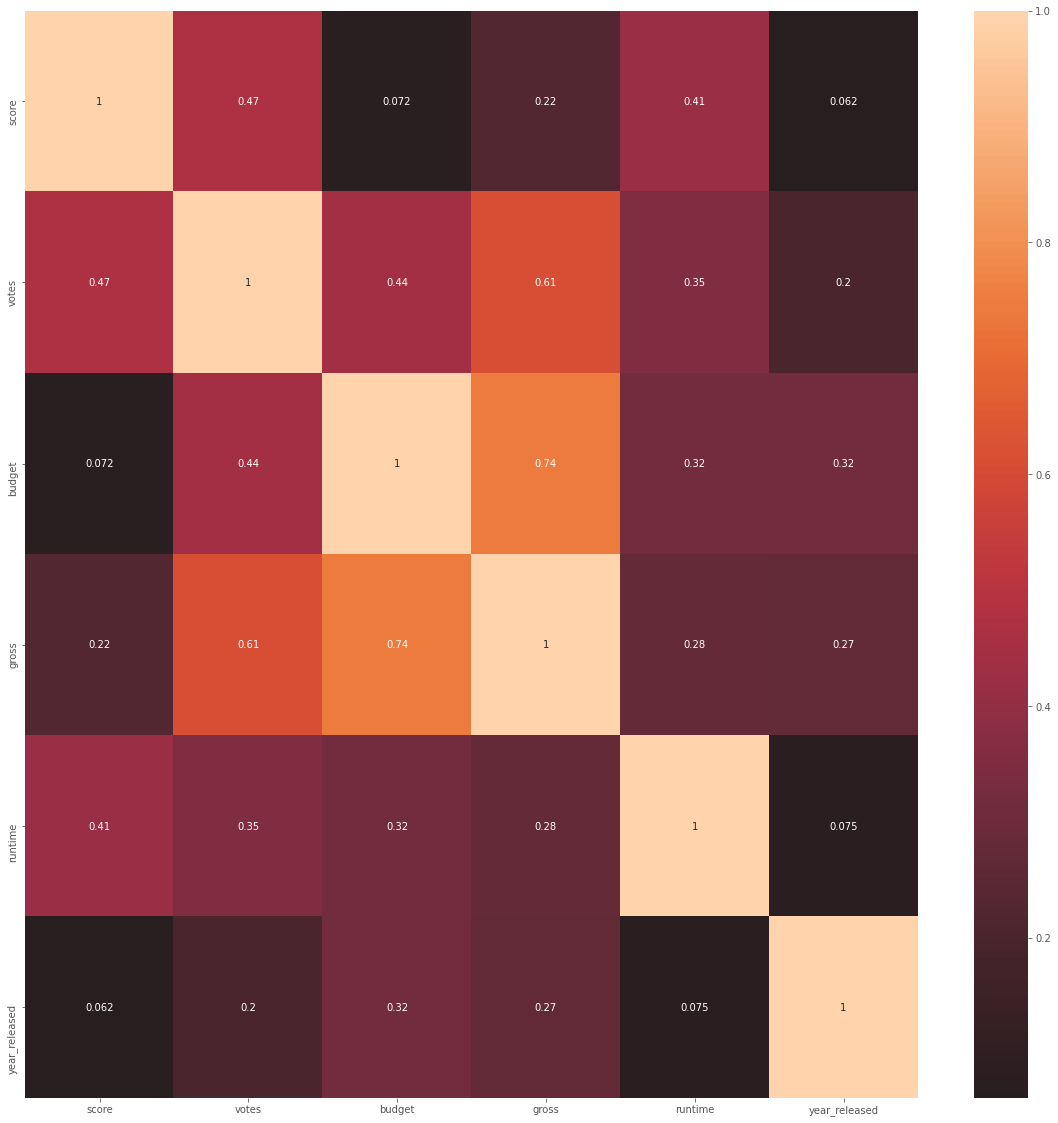

In [374]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True,center=0)

##### the big picture

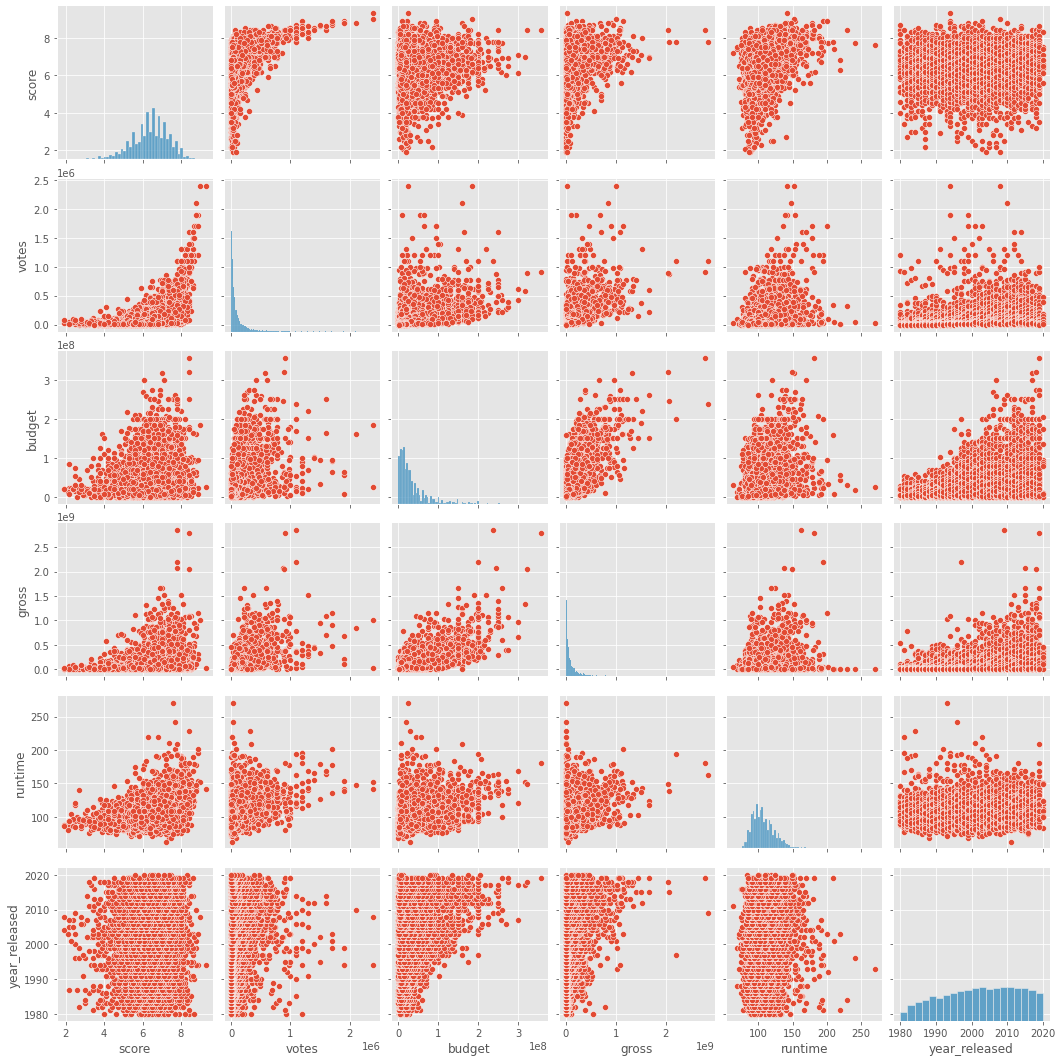

In [375]:
sns.pairplot(data=df)

### There is definitely a positive correlation between budget and gross


### drilling down...

In [376]:
plot = px.scatter(data_frame=df,
                  x='budget',
                  y='gross',
                  title='Budget vs Gross',
                  hover_name="name",
                  hover_data=['year_released'],
                 trendline="ols",
                 trendline_color_override="red")

plot.update_layout(title_x=0.5)

### There is also a noticeable correlation between budget and year released

- Movie companies have been spending more and more money to produce movies
- You can also see that movies production has more than quadrupled over the years


In [377]:
plot1 = px.scatter(data_frame=df,
                   x='year_released',
                   y='budget',
                   title='Budget vs Year',
                   trendline="ols",
                   trendline_color_override="red")

plot1.update_layout(title_x=0.5)

[Text(0.5, 1.0, 'Number of movies released each year')]

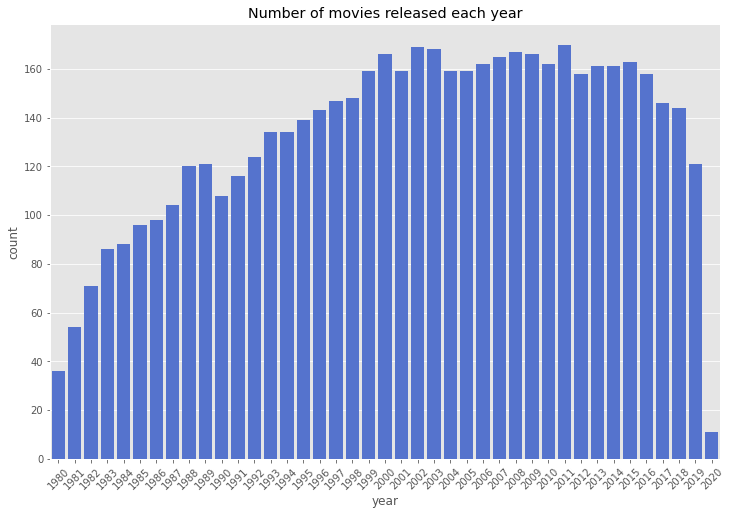

In [378]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(
    data = df['year_released'].value_counts().rename_axis('year').reset_index(name='count').sort_values('year'),
    x= 'year',
    y='count',
    color='royalblue',
    ).set(title='Number of movies released each year')
        



Score vs Votes

In [379]:
plot3 = px.scatter(data_frame=df,
                  x='score',
                  y='votes',
                  title='Score vs Votes',
                  hover_name="name",
                  hover_data=['year_released'],
                 trendline="ols",
                 trendline_color_override="red")

plot3.update_layout(title_x=0.5)

### Movies with more votes have a higher chance of getting a good score.

## More analysis 

In [380]:
plot4 = px.histogram(data_frame=df,
                x='runtime',
                title='Runtime',
                color_discrete_sequence=["royalblue"]
            )

plot4.update_layout(title_x=0.5)

### Most movies runtime is between 1h 30min to 2hours 

- there is a movie that runs for 4h 30m, lets find out which one it is:

In [381]:
df[df['runtime']>250]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
2280,Gettysburg,PG,Drama,1993-10-08,7.6,27000.0,Ron Maxwell,Michael Shaara,Tom Berenger,United States,25000000,10769960,TriStar Television,271.0,1993
